
## **TP FINAL DE CIENCIA DATOS**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__ \
__Alumnos__ __Salas Christian__
            __, Picco Lucas__

**__1. INTRODUCCION__**

Airbnb es un marketplace online en el cual se ofrece la posibilidad de contratar un servicio de renta/alquiler de hogares, casas, departamentos y quintas. Es mayormente utilizado para turismo siendo uno de los negocios mas rentables del mundo.
En este analisis de datos se encuentran las metricas utilizadas para medir la actividad del negocio. De esta manera intentaremos utilizar un modelo de predicción de precio que nos permita entender la correlación entre el precio y las distintas variables.

**2.IMPORTE DE LIBRERIAS**

**3.CARGA DEL DATASET**

**4.LIMPIEZA DE DATOS:**

-Limpieza de columnas redundantes.

-Dropeo de duplicados

-Limpieza de columnas individuales

-Remoción de NaN values

-Algunas transformaciones de datos

**5. Visualización de Datos** Uso de plots para encontrar relaciones entre las variables

**6. Analisis de regresión**

**7. Entrenamiento de modelos - Limitación de dimensionalidad**

In [1]:
## Importo librerías de maniupulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Importo librerías de Aprendizaje automático
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV

In [3]:
# leemos el data set
df=pd.read_csv('airbnb_us.csv',header=0)
type('df')
np.shape(df)

(19309, 29)

In [4]:
# tipos variales y cantidad nulls 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19309 entries, 0 to 19308
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      19309 non-null  int64  
 1   property_type           19309 non-null  object 
 2   room_type               19309 non-null  object 
 3   amenities               19309 non-null  object 
 4   accommodates            19309 non-null  int64  
 5   bathrooms               19274 non-null  float64
 6   bed_type                19309 non-null  object 
 7   cancellation_policy     19309 non-null  object 
 8   cleaning_fee            19309 non-null  bool   
 9   city                    19309 non-null  object 
 10  description             19309 non-null  object 
 11  first_review            15355 non-null  object 
 12  host_has_profile_pic    19306 non-null  object 
 13  host_identity_verified  19306 non-null  object 
 14  host_response_rate      15013 non-null

# hay variables que posee nulls como:

 bathrooms, first_review, host_response_ , last_reviews,  nieghbourhood,
review_scores, bedrooms, bed.

In [ ]:
df.head(10)    # vista gral de BD  hay 29 var, hacemos un muestreo corto del dataset.

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
0,13418779,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,750.0
1,3808709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,115.0
2,12422935,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,...,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0,85.0
3,180792,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,SF,...,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0,120.0
4,2658946,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.5,Real Bed,strict,True,DC,...,-77.031189,Charming 2 bdrm in trendy U/14th streets w/par...,U Street Corridor,13,89.0,NaN,20009,2.0,3.0,200.0
5,6226658,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.5,Real Bed,moderate,True,Chicago,...,-87.695242,Sweet Home Chicago,Humboldt Park,0,NaN,https://a0.muscache.com/im/pictures/996e04cd-5...,60622,1.0,1.0,60.0
6,7499179,Loft,Private room,"{TV,""Wireless Internet"",Kitchen,""Pets allowed""...",2,1.0,Real Bed,strict,False,Chicago,...,-87.675261,Private room in Wicker Park loft at Six Corners,Wicker Park,15,91.0,https://a0.muscache.com/im/pictures/f382cb5a-1...,60622,1.0,1.0,75.0
7,14648556,Townhouse,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,2.0,Real Bed,strict,True,Boston,...,-71.049672,"Comfy room (C) near T, convention center, down...",South Boston,12,88.0,https://a0.muscache.com/im/pictures/176088bb-3...,02127,1.0,1.0,99.0
8,2479317,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",4,1.0,Real Bed,moderate,True,DC,...,-77.037272,Dupont 1 bedroom - 1 mile from the White House!,Dupont Circle,0,NaN,https://a0.muscache.com/im/pictures/a24c135a-0...,20009,1.0,2.0,1050.0
9,16904896,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",2,1.0,Real Bed,strict,True,SF,...,-122.463129,Cozy Giants Room @Golden Gate Park,Richmond District,138,96.0,https://a0.muscache.com/im/pictures/38471493/2...,94118,1.0,1.0,125.0


In [5]:
df.head()    # vista gral de BD  hay 29 var

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
0,13418779,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,750.0
1,3808709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,115.0
2,12422935,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,...,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0,85.0
3,180792,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,SF,...,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0,120.0
4,2658946,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.5,Real Bed,strict,True,DC,...,-77.031189,Charming 2 bdrm in trendy U/14th streets w/par...,U Street Corridor,13,89.0,NaN,20009,2.0,3.0,200.0


In [ ]:
##Realizamos una busquedad de los valores nulos

df.isnull().sum()

id                           0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                   35
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review              3954
host_has_profile_pic         3
host_identity_verified       3
host_response_rate        4296
host_since                   3
instant_bookable             0
last_review               3954
latitude                     0
longitude                    0
name                         0
neighbourhood             1458
number_of_reviews            0
review_scores_rating      4134
thumbnail_url             2402
zipcode                    225
bedrooms                    17
beds                        24
price                        0
dtype: int64

# LIMPIEZA

Eliminamos columnas donde hay valores Null y no son relevantes.

No hay duplicados en BD.

Cambiamos tipo variable fecha a DATE.


In [6]:
# eliminar variables de BD son:
# amenities, review_scores_rating, longitude, thumbnail_url, cleaning_fee
columnas_eliminar = ['amenities', 'review_scores_rating','longitude','description','first_review','latitude','zipcode','thumbnail_url','cleaning_fee','thumbnail_url','cleaning_fee','host_has_profile_pic','host_identity_verified','host_response_rate','last_review','host_since']
df2 = df.drop(columnas_eliminar, axis=1) 

ELIMINADO LAS VAR NO NECESARIAS SE GUARDO LA BD EN
DF2 PARA POSTERIOR ANALISIS.

In [7]:
df2.head()           # se elemino 12 variables no necesarias para analisis   

,id,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,city,instant_bookable,name,neighbourhood,number_of_reviews,bedrooms,beds,price
0,13418779,House,Entire home/apt,4,1.0,Real Bed,flexible,SF,f,Beautiful Flat in the Heart of SF!,Lower Haight,0,2.0,2.0,750.0
1,3808709,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,DC,t,Great studio in midtown DC,Columbia Heights,4,0.0,1.0,115.0
2,12422935,Apartment,Private room,2,1.0,Real Bed,strict,SF,t,Comfort Suite San Francisco,Noe Valley,3,1.0,1.0,85.0
3,180792,House,Private room,2,1.0,Real Bed,moderate,SF,f,Cozy Garden Studio - Private Entry,Richmond District,159,1.0,1.0,120.0
4,2658946,Apartment,Entire home/apt,6,1.5,Real Bed,strict,DC,t,Charming 2 bdrm in trendy U/14th streets w/par...,U Street Corridor,13,2.0,3.0,200.0


In [8]:
np.shape(df2)      # quedo al final 15 var

(19309, 15)

In [9]:
df2.info() #  no se ven duplicados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19309 entries, 0 to 19308
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   19309 non-null  int64  
 1   property_type        19309 non-null  object 
 2   room_type            19309 non-null  object 
 3   accommodates         19309 non-null  int64  
 4   bathrooms            19274 non-null  float64
 5   bed_type             19309 non-null  object 
 6   cancellation_policy  19309 non-null  object 
 7   city                 19309 non-null  object 
 8   instant_bookable     19309 non-null  object 
 9   name                 19309 non-null  object 
 10  neighbourhood        17851 non-null  object 
 11  number_of_reviews    19309 non-null  int64  
 12  bedrooms             19292 non-null  float64
 13  beds                 19285 non-null  float64
 14  price                19309 non-null  float64
dtypes: float64(4), int64(3), object(8)
m

In [10]:
df2['beds'].unique()

array([ 2.,  1.,  3.,  4.,  5., 10.,  6.,  9.,  8., nan,  7., 14., 13.,
       16., 11., 15.,  0., 12.])

In [11]:
df2['bathrooms'].unique()

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4.5, 4. , 0. , 5.5, nan, 0.5, 6. ,
       5. , 8. , 6.5])

In [12]:
df2['bedrooms'].unique()

array([ 2.,  0.,  1.,  3.,  4., nan,  6.,  5.,  7.,  9., 10.,  8.])

#  eliminar o remplazar registros NULL

BUSCAR SI HAY REGISTROS NULL. BORRAR LA COLUMNA, REMPLAZAR O BORRAR ESOS REGISTROS

In [13]:
df2.isnull().any()      # que columnas tiene NUlls

id                     False
property_type          False
room_type              False
accommodates           False
bathrooms               True
bed_type               False
cancellation_policy    False
city                   False
instant_bookable       False
name                   False
neighbourhood           True
number_of_reviews      False
bedrooms                True
beds                    True
price                  False
dtype: bool

In [14]:
df2.isnull().sum().sort_values(ascending=False)     # Cantidad de NULLS de cada var

neighbourhood          1458
bathrooms                35
beds                     24
bedrooms                 17
id                        0
property_type             0
room_type                 0
accommodates              0
bed_type                  0
cancellation_policy       0
city                      0
instant_bookable          0
name                      0
number_of_reviews         0
price                     0
dtype: int64

Procedemos a las registros Nulls en Neigbourhood remplazar por "no definido".\
.
Completar con 0 los registros de las variables bathrooms, beds, y bedrooms.

In [15]:
df2['neighbourhood'] = df2['neighbourhood'].fillna('no_definido').str.replace('nan', 'no_definido')
df2['bathrooms'] = df2['bathrooms'].fillna('0')
df2['beds'] = df2['beds'].fillna('0')
df2['bedrooms'] = df2['bedrooms'].fillna('0')

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19309 entries, 0 to 19308
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   19309 non-null  int64  
 1   property_type        19309 non-null  object 
 2   room_type            19309 non-null  object 
 3   accommodates         19309 non-null  int64  
 4   bathrooms            19309 non-null  object 
 5   bed_type             19309 non-null  object 
 6   cancellation_policy  19309 non-null  object 
 7   city                 19309 non-null  object 
 8   instant_bookable     19309 non-null  object 
 9   name                 19309 non-null  object 
 10  neighbourhood        19309 non-null  object 
 11  number_of_reviews    19309 non-null  int64  
 12  bedrooms             19309 non-null  object 
 13  beds                 19309 non-null  object 
 14  price                19309 non-null  float64
dtypes: float64(1), int64(3), object(11)


# Remplaza simbolos

Remplaza simbolos "/" y "-" dentro de registros de propiedad y tipo cuarto

In [17]:
df2['property_type'] = df2['property_type'].str.replace('/','')  # un registro Camper/RV se saco el simbolo /.
df2['property_type'] = df2['property_type'].str.replace('-','')
df2['room_type'] = df2['room_type'].str.replace('/','')
df2['property_type'].value_counts()

Apartment             11509
House                  4803
Condominium            1568
Townhouse               501
Loft                    205
Other                   171
Bed & Breakfast         135
Guest suite              65
Inlaw                    64
Guesthouse               55
Dorm                     49
Boutique hotel           47
Timeshare                33
Boat                     30
Hostel                   16
Bungalow                 13
Villa                    11
CamperRV                 10
Cabin                     8
Castle                    4
Serviced apartment        3
Treehouse                 3
Yurt                      2
Tent                      1
Train                     1
Vacation home             1
Cave                      1
Name: property_type, dtype: int64

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19309 entries, 0 to 19308
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   19309 non-null  int64  
 1   property_type        19309 non-null  object 
 2   room_type            19309 non-null  object 
 3   accommodates         19309 non-null  int64  
 4   bathrooms            19309 non-null  object 
 5   bed_type             19309 non-null  object 
 6   cancellation_policy  19309 non-null  object 
 7   city                 19309 non-null  object 
 8   instant_bookable     19309 non-null  object 
 9   name                 19309 non-null  object 
 10  neighbourhood        19309 non-null  object 
 11  number_of_reviews    19309 non-null  int64  
 12  bedrooms             19309 non-null  object 
 13  beds                 19309 non-null  object 
 14  price                19309 non-null  float64
dtypes: float64(1), int64(3), object(11)


# VISUALIZACION
Realizamos graficos entre diferentes variables del DF.

In [19]:
df2['city'].value_counts()

SF         6434
DC         5688
Chicago    3719
Boston     3468
Name: city, dtype: int64

In [20]:
top_city = df['city'].value_counts().index[0:10]

C:\Users\n35463\AppData\Local\Temp\ipykernel_88\1986741393.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df.corr(method='pearson'))
C:\Users\n35463\AppData\Local\Temp\ipykernel_88\1986741393.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), annot=True, center=0, square=True, linewidths=.5)


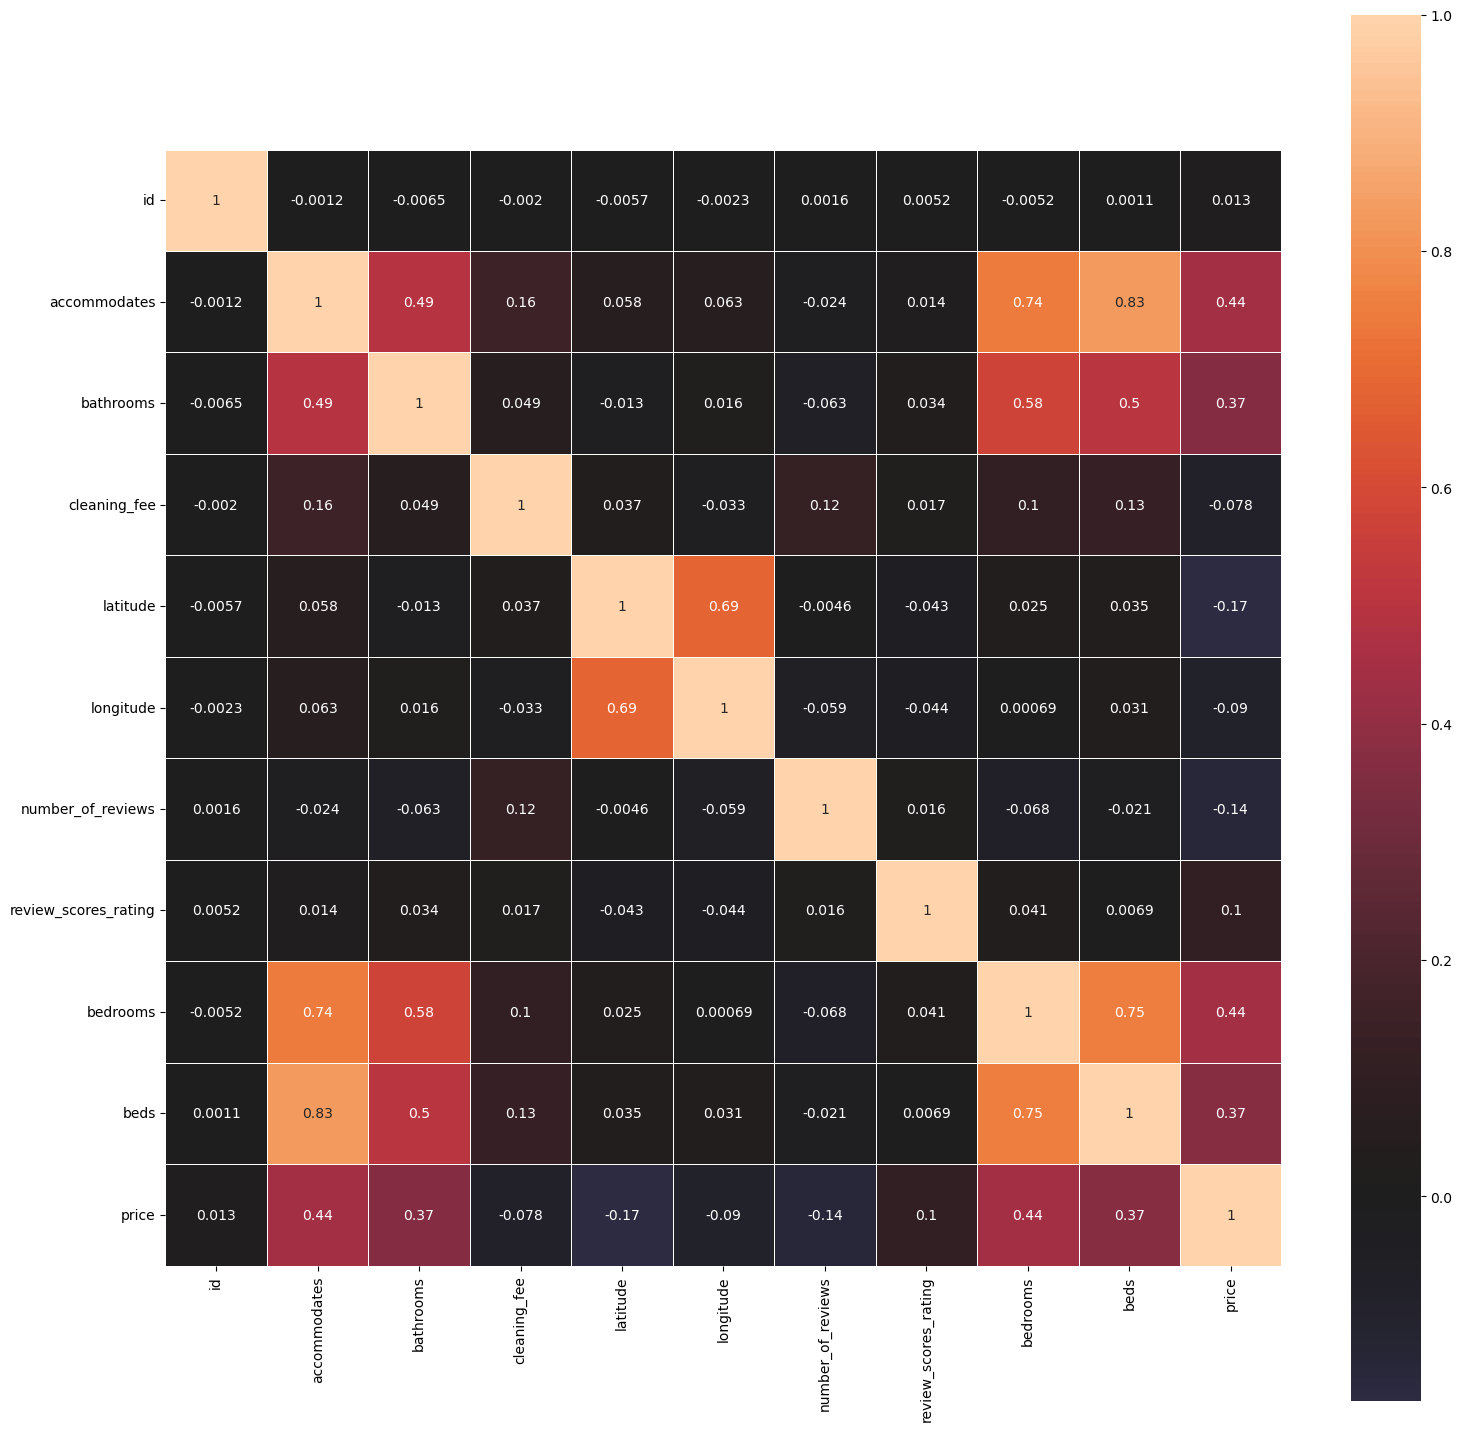

In [65]:
##BUSCAREMOS UTILIZAR UNA CORRELACIÓN DE DATOS ENTRE VARIABLES A TRAVES DEL METODO PEARSON
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(df.corr(method='pearson'))
sns.heatmap(df.corr(method='pearson'), annot=True, center=0, square=True, linewidths=.5)
plt.show()

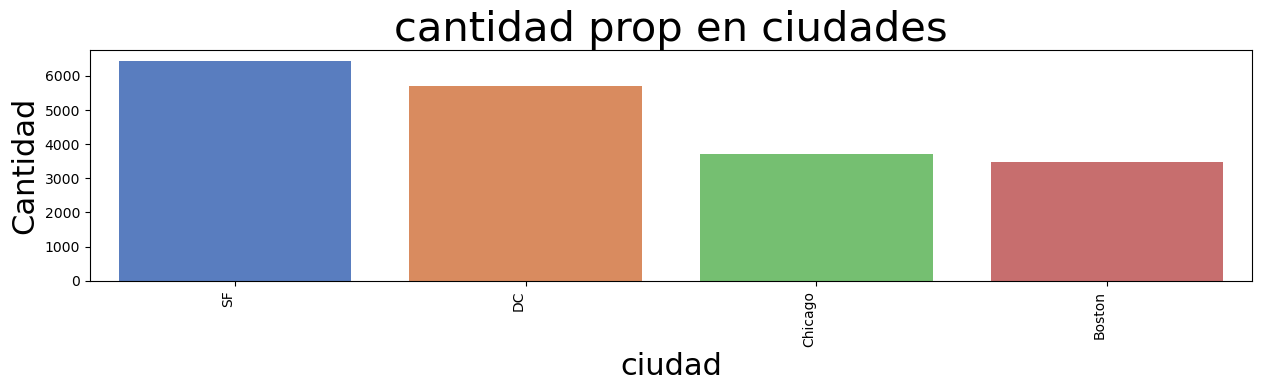

In [21]:
plt.figure(figsize=(15,3))
g = sns.countplot(x='city',data=df2, palette = "muted",order=top_city)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('cantidad prop en ciudades',size = 30)
plt.xlabel("ciudad",size = 22)
plt.ylabel("Cantidad",size = 22)
plt.show()

En el grafico de barras observamos que la mayoria de los hospedajes se presentan en la ciudad San francisco y Washington

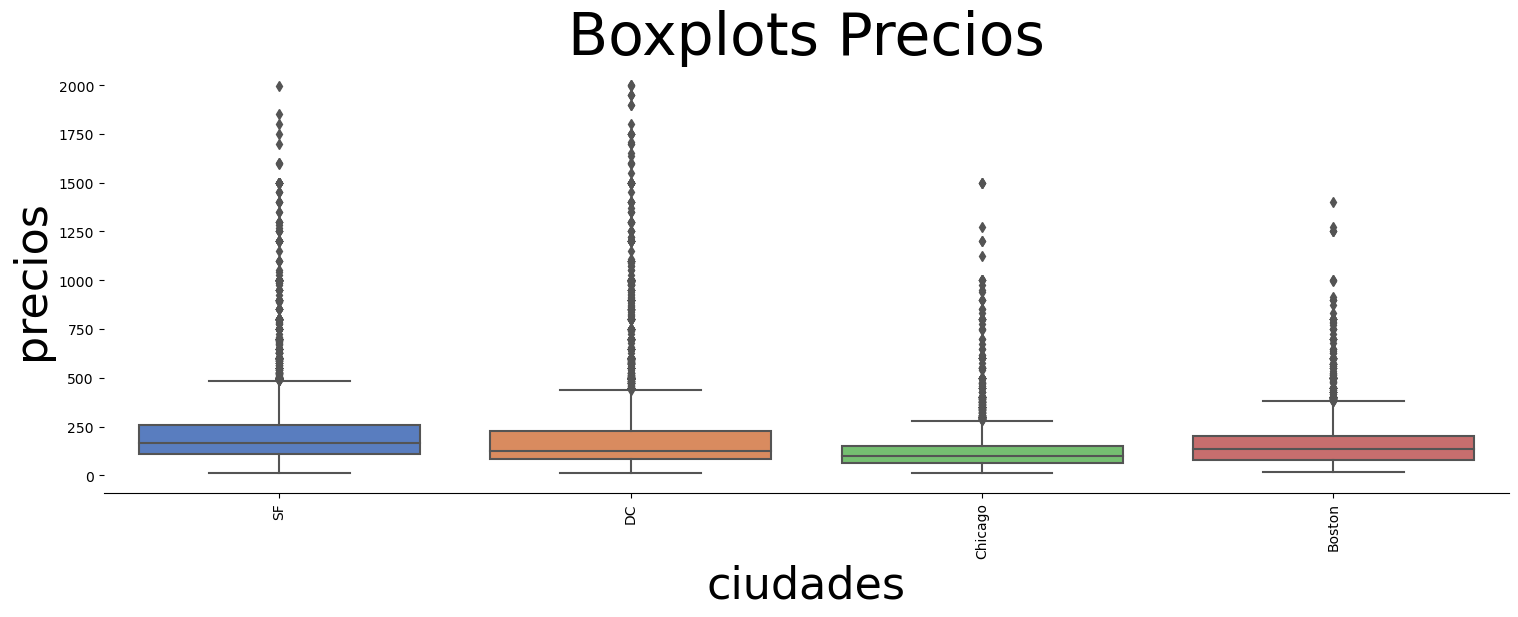

In [22]:
# Boxplot de precios segun la ciudades
g = sns.catplot(data=df2,
                x='city',y='price', 
                kind="box", height = 5 ,aspect=3,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
plt.xlabel("ciudades",fontsize=32)
plt.ylabel("precios",fontsize=32)
plt.title('Boxplots Precios',size = 42)
plt.show()

En el boxplot los precios se concentrar entre 50 a 250 dolares por noche de hospedaje.
Varios precios se ven fuera del Boxplot debido a que son otro tipo de propiedades como departamento o casa.
Los precios mas altos los presenta DC y SF.

Cantidad de Barrios en la BD 

In [23]:
q_barrios = len(df2['neighbourhood'].unique())
print(f'En total hay {q_barrios} barrios\r\n')

En total hay 279 barrios



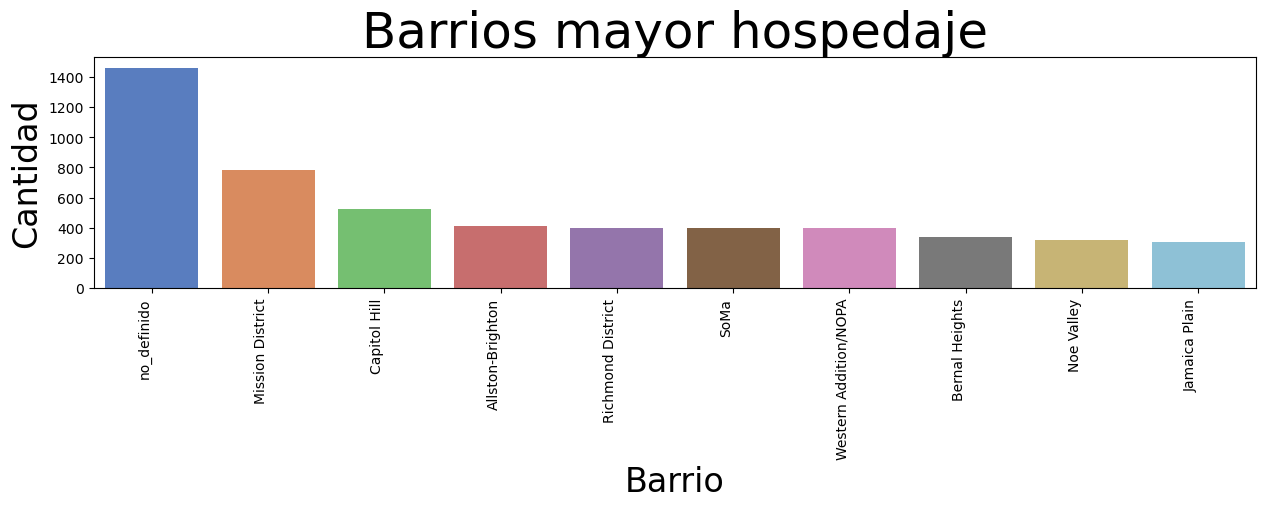

In [24]:
top_neighbourhood = df2['neighbourhood'].value_counts().index[0:10]

plt.figure(figsize=(15,3))
g = sns.countplot(x='neighbourhood',data=df2, palette = "muted",order=top_neighbourhood)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Barrios mayor hospedaje',size = 36)
plt.xlabel("Barrio",size = 24)
plt.ylabel("Cantidad",size = 24)
plt.show()

En el grafico Barra observamos que el posee mayor hospedaje no_definido en los registros pero si su precio. 2do lugar es Mission District con 750 registros seguido 3er de Capitol Hill con 500 registros. 

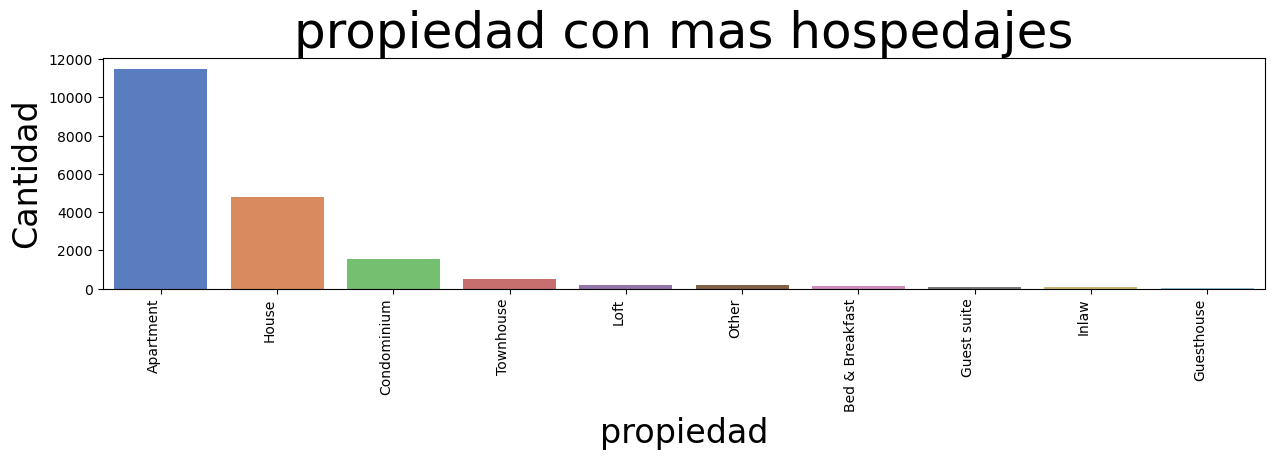

In [25]:
top_property = df2['property_type'].value_counts().index[0:10]

plt.figure(figsize=(15,3))
g = sns.countplot(x='property_type',data=df2, palette = "muted",order=top_property)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('propiedad con mas hospedajes',size = 36)
plt.xlabel("propiedad",size = 24)
plt.ylabel("Cantidad",size = 24)
plt.show()

Observamos que el tipo de propiedad mas elegido por los clientes en Departamentos con 11800 registros. Seguido de Casas con 5000 registros a la hora de elegir hospedajes.

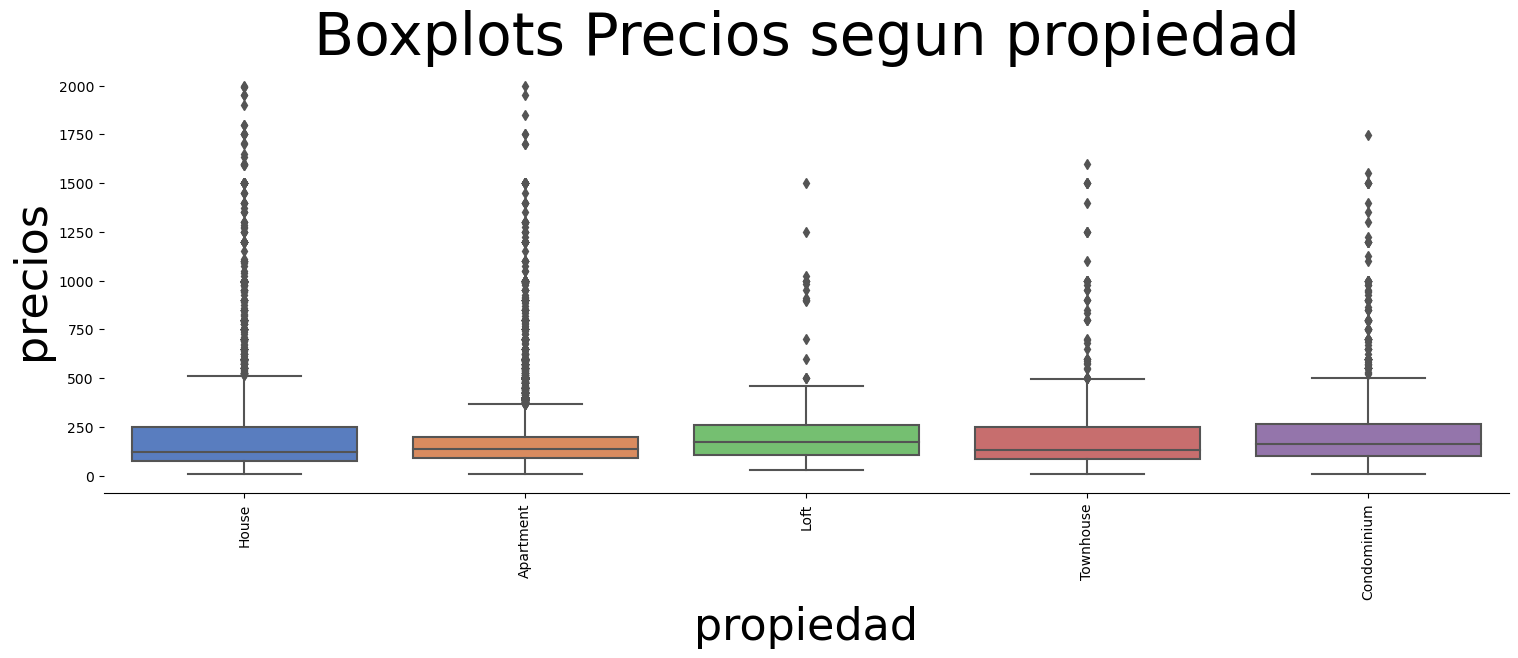

In [26]:
top5_property_types = df2['property_type'].value_counts().head(5).index
df2_top5 = df2[df2['property_type'].isin(top5_property_types)]

g = sns.catplot(data=df2_top5, x='property_type', y='price', kind="box", height=5, aspect=3, palette="muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
plt.xlabel("propiedad",fontsize=32)
plt.ylabel("precios",fontsize=32)
plt.title('Boxplots Precios segun propiedad',size = 42)
plt.show()

En el boxplot vemos que el hospedaje mas caro es de Houses con valores por ensima de 2000 dolares la noche segun cantidad de ambientes. Presigue Departamentos.

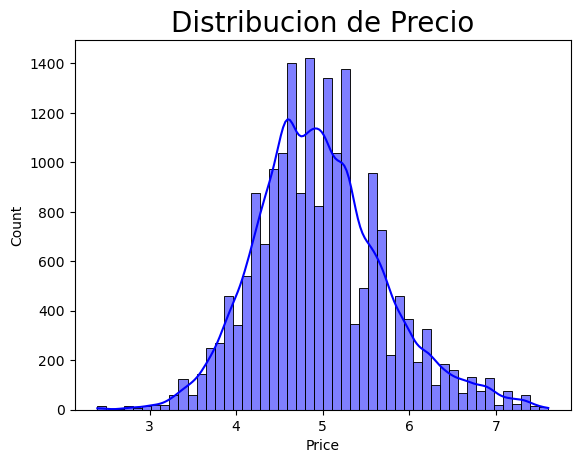

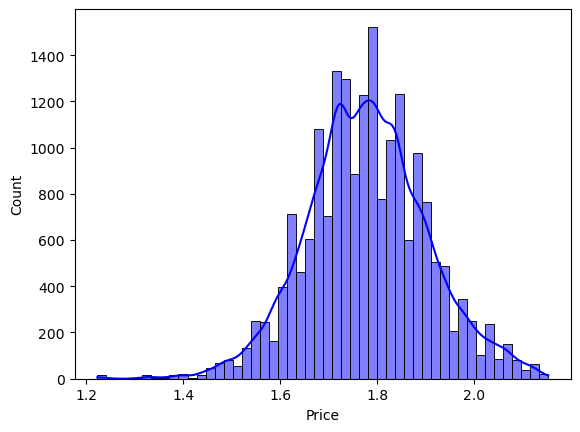

In [27]:
#Columna log precios
df2['price'] = np.log(1+df2['price'])

#Plot Precio
sns.histplot(df2['price'],bins=50,color='b',kde=True,stat='count')
plt.xlabel("Price")
plt.title('Distribucion de Precio',size = 20)
plt.show()

#Plot Log-Precio
sns.histplot(np.log(1+df2['price']),bins=50,color='b',kde=True,stat='count')
plt.xlabel("Price")
plt.show()

#  variables categoricas

PARA CREAR LAS VAR DUMMIES CATEGORICAS DE 2 VAR SE CREO UN DF3.

VAR INDEPENDIENTE CIUDAD E TIPO PROPIEDAD.


In [28]:
# genero var dummies convierto a categoricas la var CITY
city_dummies = pd.get_dummies(df2['city'])  
df3=pd.concat([df2,city_dummies],axis=1)  # concadenamos con BD reducida

In [29]:
city_dummies.head() 

,Boston,Chicago,DC,SF
0,0,0,0,1
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0


In [30]:
df3.head()

,id,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,city,instant_bookable,name,neighbourhood,number_of_reviews,bedrooms,beds,price,Boston,Chicago,DC,SF
0,13418779,House,Entire homeapt,4,1.0,Real Bed,flexible,SF,f,Beautiful Flat in the Heart of SF!,Lower Haight,0,2.0,2.0,6.621406,0,0,0,1
1,3808709,Apartment,Entire homeapt,2,1.0,Real Bed,moderate,DC,t,Great studio in midtown DC,Columbia Heights,4,0.0,1.0,4.753590,0,0,1,0
2,12422935,Apartment,Private room,2,1.0,Real Bed,strict,SF,t,Comfort Suite San Francisco,Noe Valley,3,1.0,1.0,4.454347,0,0,0,1
3,180792,House,Private room,2,1.0,Real Bed,moderate,SF,f,Cozy Garden Studio - Private Entry,Richmond District,159,1.0,1.0,4.795791,0,0,0,1
4,2658946,Apartment,Entire homeapt,6,1.5,Real Bed,strict,DC,t,Charming 2 bdrm in trendy U/14th streets w/par...,U Street Corridor,13,2.0,3.0,5.303305,0,0,1,0


In [31]:
df3['city'].unique()

array(['SF', 'DC', 'Chicago', 'Boston'], dtype=object)

In [32]:
df3['room_type'].value_counts()

Entire homeapt    12063
Private room       6864
Shared room         382
Name: room_type, dtype: int64

In [33]:
room_type_dummies = pd.get_dummies(df3['room_type'])   # var categorica de tipo habitaciones
df3=pd.concat([df3,room_type_dummies],axis=1)

In [34]:
room_type_dummies.head()

,Entire homeapt,Private room,Shared room
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0


In [35]:
df3.head()

,id,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,city,instant_bookable,name,...,bedrooms,beds,price,Boston,Chicago,DC,SF,Entire homeapt,Private room,Shared room
0,13418779,House,Entire homeapt,4,1.0,Real Bed,flexible,SF,f,Beautiful Flat in the Heart of SF!,...,2.0,2.0,6.621406,0,0,0,1,1,0,0
1,3808709,Apartment,Entire homeapt,2,1.0,Real Bed,moderate,DC,t,Great studio in midtown DC,...,0.0,1.0,4.753590,0,0,1,0,1,0,0
2,12422935,Apartment,Private room,2,1.0,Real Bed,strict,SF,t,Comfort Suite San Francisco,...,1.0,1.0,4.454347,0,0,0,1,0,1,0
3,180792,House,Private room,2,1.0,Real Bed,moderate,SF,f,Cozy Garden Studio - Private Entry,...,1.0,1.0,4.795791,0,0,0,1,0,1,0
4,2658946,Apartment,Entire homeapt,6,1.5,Real Bed,strict,DC,t,Charming 2 bdrm in trendy U/14th streets w/par...,...,2.0,3.0,5.303305,0,0,1,0,1,0,0


In [36]:
# se agregaron las var categoricas de Propety y City a la BD principal para posterior analisis

#  definir variables entranamiento y prueba

Dividimos el DF en var dependientes e independientes

In [37]:
y = np.array(df3[["price"]])                                     # convierte en array Numpy para calculos mas complejo
x = df3.drop(['price', 'room_type','city','property_type','bed_type','cancellation_policy','instant_bookable','name','neighbourhood','id','number_of_reviews','accommodates'], axis=1)

In [38]:
x.head()

,bathrooms,bedrooms,beds,Boston,Chicago,DC,SF,Entire homeapt,Private room,Shared room
0,1.0,2.0,2.0,0,0,0,1,1,0,0
1,1.0,0.0,1.0,0,0,1,0,1,0,0
2,1.0,1.0,1.0,0,0,0,1,0,1,0
3,1.0,1.0,1.0,0,0,0,1,0,1,0
4,1.5,2.0,3.0,0,0,1,0,1,0,0


In [39]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19309 entries, 0 to 19308
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bathrooms       19309 non-null  object
 1   bedrooms        19309 non-null  object
 2   beds            19309 non-null  object
 3   Boston          19309 non-null  uint8 
 4   Chicago         19309 non-null  uint8 
 5   DC              19309 non-null  uint8 
 6   SF              19309 non-null  uint8 
 7   Entire homeapt  19309 non-null  uint8 
 8   Private room    19309 non-null  uint8 
 9   Shared room     19309 non-null  uint8 
dtypes: object(3), uint8(7)
memory usage: 584.7+ KB


In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(x.values, y, test_size=0.2, random_state=4)

In [41]:
xtrain

array([[1.0, 1.0, 1.0, ..., 1, 0, 0],
       [1.0, 1.0, 1.0, ..., 0, 1, 0],
       [1.0, 1.0, 1.0, ..., 0, 1, 0],
       ...,
       [1.0, 1.0, 1.0, ..., 1, 0, 0],
       [1.0, 1.0, 1.0, ..., 1, 0, 0],
       [2.0, 4.0, 8.0, ..., 1, 0, 0]], dtype=object)

In [42]:
scaler = preprocessing.StandardScaler().fit(xtrain)    #aprender un scaler para media y desvio std

In [43]:
xtrain_scal = scaler.transform(xtrain)
xtest_scal = scaler.transform(xtest)      

In [44]:
xtrain_scal.shape

(15447, 10)

In [45]:
xtest_scal.shape

(3862, 10)

<Axes: >

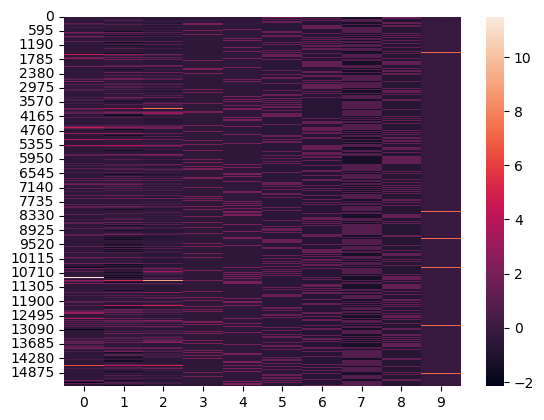

In [46]:
sns.heatmap(xtrain_scal) # matriz correlacion

<Axes: >

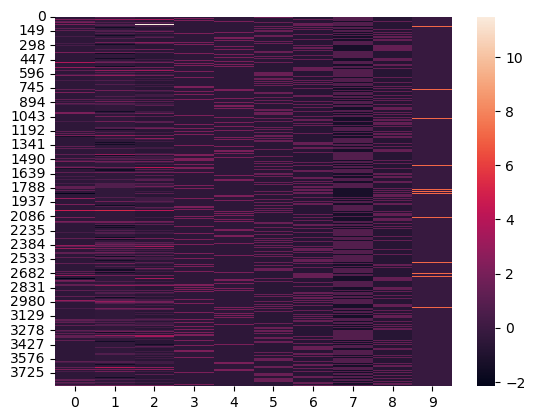

In [47]:
sns.heatmap(xtest_scal)

# Modelo de Regresion Lineal

In [48]:
model = LinearRegression()

In [49]:
model.fit(xtrain,ytrain)  #entrenar los datos entranamiento dataset

LinearRegression()

In [50]:
predictions=model.predict(xtest) #prediccion y mean saquared error

In [64]:
ypred=model.predict(xtest)
print('R2 Score: {:.2f}'.format(r2_score(ytest,ypred)))
print('Mean Squared Error {:.2f}'.format(mean_squared_error(ytest,ypred)))
mse_rl=mean_squared_error(ytest,predictions) #MSE mean squared error 
mse_rl

R2 Score: 0.49
Mean Squared Error 0.29


0.29029694752781093

Indica que que hay una variacion en la prediccion de 0.29 dolares con respecto al precio de hospedaje utilizando con el modelo de regresion lineal

# KNN Regressor

In [52]:
#MachineLearning
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [53]:
knn = KNeighborsRegressor(weights = "distance")                # MODELO REGRESION KNN
parameters_k = np.arange(20,41,5)
parameters_knn = [{'n_neighbors': parameters_k}]                
regressor_knn = GridSearchCV(knn, parameters_knn, refit = True, cv=5, verbose=True)  
# CV crossvalidation, parametros, KNN modelo. 

In [54]:
regressor_knn.fit(xtrain_scal, ytrain) # entrenamiento con modelo

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(weights='distance'),
             param_grid=[{'n_neighbors': array([20, 25, 30, 35, 40])}],
             verbose=True)

In [55]:
regressor_knn.best_params_           # MEJORES PARAMETROS

{'n_neighbors': 30}

In [56]:
regressor_knn.best_score_                       # ERROR  R2

0.48139796774927135

In [57]:
ypred2 = regressor_knn.predict(xtest_scal)               # PREDICIR X TEST 

In [58]:
np.sqrt(mean_squared_error(ytest, ypred2))               # ERROR CUADRATICO MEDIO

0.5396411839188995

In [59]:
mse_knn = mean_squared_error(ytest, ypred2)
mse_knn

0.29121260738139154

# Support Vector Regressor 

In [60]:
svreg = SVR()                    # MODELO SUPPORT 

In [61]:
param_svreg = {'kernel':('linear', 'rbf'), 'C':[1, 10 ], 'gamma':[ 0.1,1]}     #DEFINO PARAMETROS

In [62]:
regressor_svr = GridSearchCV(svreg, param_svreg, cv=3, verbose=True)
# modelo, parametros, CV crossvalidation

In [63]:
regressor_svr.fit(xtrain_scal, ytrain.ravel()) # entrenamiento modelo

Fitting 3 folds for each of 8 candidates, totalling 24 fits


KeyboardInterrupt: 

In [ ]:
regressor_svr.best_params_ # mejores parametros

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
regressor_svr.best_score_  

0.494776047136073

In [ ]:
ypred3 = regressor_svr.predict(xtest_scal)       # VUELVO PREDECIR 
ypred3

array([4.80969618, 5.77959284, 3.4361321 , ..., 4.33422107, 5.18121634,
       4.71496136])

In [ ]:
np.sqrt(mean_squared_error(ytest, ypred3))          #ERROR raiz cuadrada de error cuadratico medio

0.5377343705520724

In [ ]:
mse_svg = mean_squared_error(ytest, ypred3)
mse_svg

0.28915825327303346

# RandomForest Regressor

In [ ]:
rf= RandomForestRegressor()              # MODELO ALGORITMO 

In [ ]:
param_trees = {'n_estimators': [50, 200], 
               'max_features': [0.5, 'sqrt','log2'],  
               'min_samples_leaf':[1, 5]}

In [ ]:
regressor_rf = GridSearchCV(rf, param_grid = param_trees, refit = True, cv = 3)       # PARAMETROS GRID LE PASO 3 FOLD
regressor_rf.fit(xtrain, ytrain.ravel())

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_features': [0.5, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5],
                         'n_estimators': [50, 200]})

In [ ]:
regressor_rf.best_params_        # MEJORES PARAMETROS

{'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 200}

In [ ]:
regressor_rf.best_score_ # R2 PARA MEJOR PARAMETROS   

0.5051950585932351

In [ ]:
ypred4 = regressor_rf.predict(xtest_scal)
ypred4

array([4.81719207, 5.44523778, 3.91731989, ..., 4.51354425, 4.85025251,
       4.74515434])

In [ ]:
np.sqrt(mean_squared_error(ytest, ypred4))         # ERROR CUADRATICO MEDIO 

0.6179905796668518

In [ ]:
mse_rfr = mean_squared_error(ytest, ypred4)
mse_rfr

0.38191235655697153

In [ ]:
resultado = {'mse_rl','mse_knn','mse_svr','mse_rfr'}
df_mse = pd.DataFrame(resultado)
df_mse

,0
0,mse_rfr
1,mse_knn
2,mse_svr
3,mse_rl


In [ ]:
resultado = pd.DataFrame(columns=['Model','mse'])

In [ ]:
#Guardamos resultados
resultado = resultado.append({'Model':'mse_rl','mse':mse_rl},ignore_index=True)
resultado = resultado.append({'Model':'mse_knn','mse':mse_knn},ignore_index=True)
resultado = resultado.append({'Model':'mse_svg','mse':mse_svg},ignore_index=True)
resultado = resultado.append({'Model':'mse_rfr','mse':mse_rfr},ignore_index=True)
resultado


C:\Users\christian\AppData\Local\Temp\ipykernel_7316\3462018232.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultado = resultado.append({'Model':'mse_rl','mse':mse_rl},ignore_index=True)
C:\Users\christian\AppData\Local\Temp\ipykernel_7316\3462018232.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultado = resultado.append({'Model':'mse_knn','mse':mse_knn},ignore_index=True)
C:\Users\christian\AppData\Local\Temp\ipykernel_7316\3462018232.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultado = resultado.append({'Model':'mse_svg','mse':mse_svg},ignore_index=True)
C:\Users\christian\AppData\Local\Temp\ipykernel_7316\3462018232.py:5: FutureWarning: The frame.append method is deprecated and will be remove

,Model,mse
0,mse_rl,0.290217
1,mse_knn,0.291213
2,mse_svg,0.289158
3,mse_rfr,0.381912


El mejor modelo que tiene menor Error Cuadratico medio es el modelo regresion lineal mse_rl = 0.29.
Indica la prediccion tiene un variacion de 0.29 dolares por cada dolar de hospedaje

# Analisis componentes PCA (reduccion dimensiones)

In [ ]:
xtrain_scal.shape

(15447, 10)

In [ ]:
from sklearn.decomposition import PCA       # liberia de reduccion dimiension
# cantidad de componentes a extraer
n_comps = 6
# definimos PCA
pca = PCA(n_components= n_comps)  # n_compons nro componentes retener luego de PCA. 
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(xtrain_scal))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

In [ ]:
pca.explained_variance_

array([2.79202478, 1.51480974, 1.40879394, 1.29613368, 1.22309859,
       1.0302508 ])

In [ ]:
pca.explained_variance_ratio_

array([0.2791844 , 0.15147117, 0.14087027, 0.12960498, 0.12230194,
       0.10301841])

In [ ]:
# observamos el shape de la matriz obtenida del PCA. Ver que nuestro dataset se redujo de 30 a 10 dimensiones
xpca.shape

(15447, 6)

<Axes: >

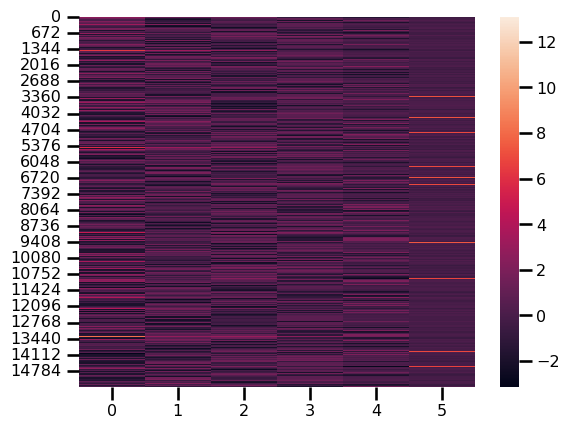

In [ ]:
sns.heatmap(xpca)  # correlacion de la nueva matriz PCA reducida

# Observamos los autovalores obtenidos del PCA
Los autovectores indican como proyectar los datos X sobre los componetes principales Y. 
Los autovalores indican el nivel importancia de cada componente principal

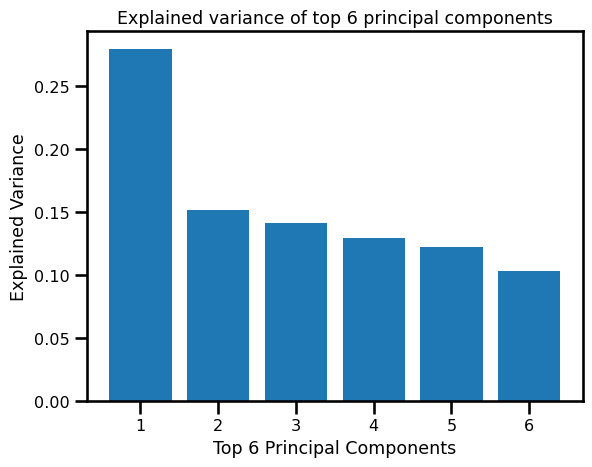

In [ ]:
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top ' + str(n_comps) + ' principal components')
plt.xlabel('Top ' +str(n_comps) + ' Principal Components')
plt.ylabel('Explained Variance')
plt.show()

Los primeros 2 componentes de PCA nos permite visualizar el 48% de la variabilidad de los datos.\
con los 2 componentes visualizamos datos de 10 dimensiones originales para el modelo. 

Variabilidad acumulada de los componetes

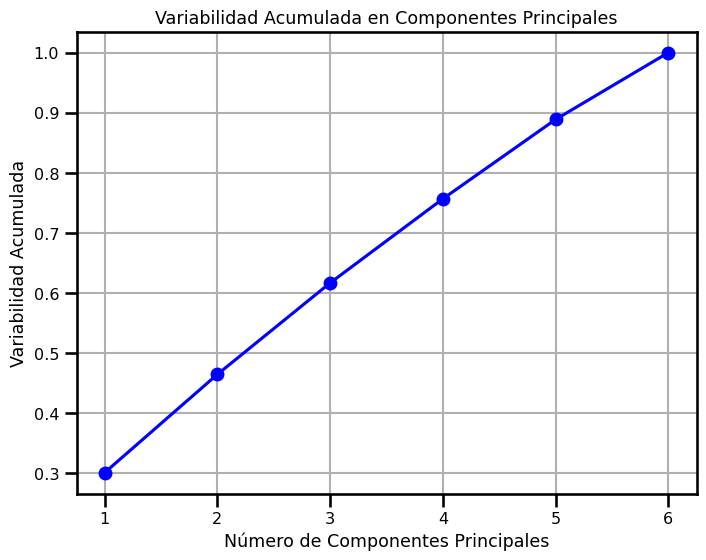

In [ ]:
pca.fit(xpca)

# Obtener las proporciones de varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular la variabilidad acumulada
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Graficar la variabilidad acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_comps + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Variabilidad Acumulada en Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Variabilidad Acumulada')
plt.grid(True)
plt.show()